## 주성분분석(PCA, principal component analysis) :차원축소 모델

In [ ]:
# - 주성분(주요 구성요소, 특성)
# 대표적인 차원축소 모델
# - 지도 /비지도 모두 사용가능합니다
# - 특성이 많으면 훈련모델의 성능은 높지만, 과대적합 될 가능성은 커짐
# 이때, 차원축소를 이용하면 성능을 유지하면서, 속도를 높일 수 있음

### <차원축소>
# - 데이터를 가장 잘 나타내는 일부 특성을 선택
# - 데이터 크기(특성)을 줄이면서 학습모델의 성능을 향상시키는 방법
# - 축소된 차원을 다시 원본 차원으로 손실을 최소화하면서 복원이 가능함

### <장점>
# - 대량의 데이터를 이용하여 모델 훈련 시에
# -시간이 오래 걸리는 경우 적용해 볼 수 있음
# - 훈련시간 개선 및 성능 유지 및 향상 가능

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
fruits=np.load('./data/09_fruits_300.npy')
print(fruits.shape)

#첫번째 축 : 300개 행
#두번째 축 : 열이 100개
#세번째 축:  깊이 100개 (실제 데이터가 들어있는 곳) 

fruits_2d = fruits.reshape(-1,100*100)
print(fruits_2d.shape)

(300, 100, 100)
(300, 10000)


In [60]:
df = pd.DataFrame(fruits_2d)
df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,1,1,1,1,1
296,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
297,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
298,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [61]:
#사용하는 패키지 : sklearn.decomposition
#사용하는 클래스(모델) : PCA
from sklearn.decomposition import PCA

#클래스(모델) 생성하기
#n_components : 주성분의 갯수를 지정(찾을 주성분 갯수)
pca = PCA(n_components = 50)

#훈련모델 생성하기
pca.fit(fruits_2d)



PCA(n_components=50)

In [62]:
#찾은 주성분 조회하기
print(pca.components_.shape)

(50, 10000)


In [63]:
def draw_fruits(arr, ratio=1) : 
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols, 
                            figsize = (cols *ratio, rows*ratio),
                            squeeze = False)
    for i in range(rows) : 
        for j in range(cols):
            if i*10+j < n:
                axs[i,j].imshow(arr[i*10+j], cmap = 'gray_r')
            axs[i,j].axis('off')
            
    plt.show()

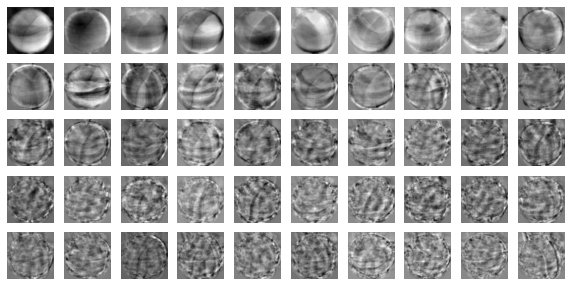

In [64]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [65]:
print(fruits_2d.shape)

(300, 10000)


## 차원 축소하기

In [66]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [67]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [70]:
# 2d -> 3d로 변환
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
print(fruits_reconstruct.shape)

(300, 100, 100)


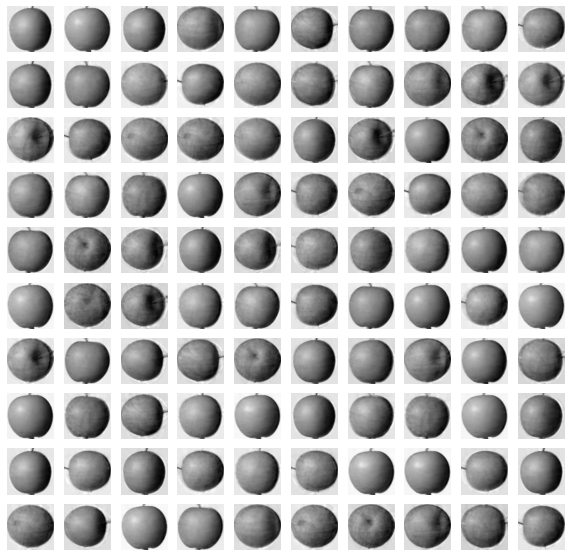

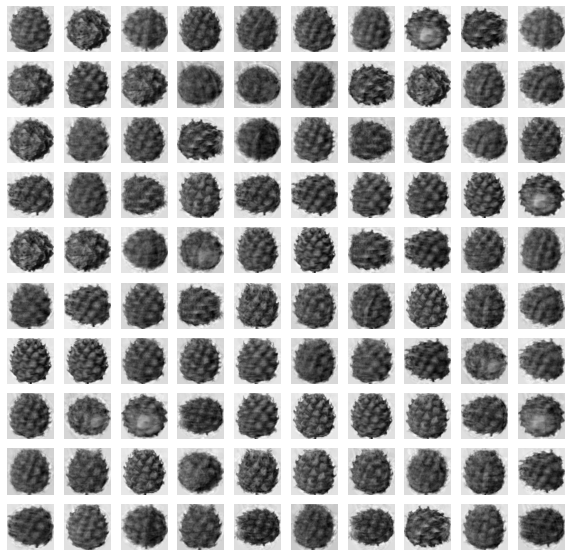

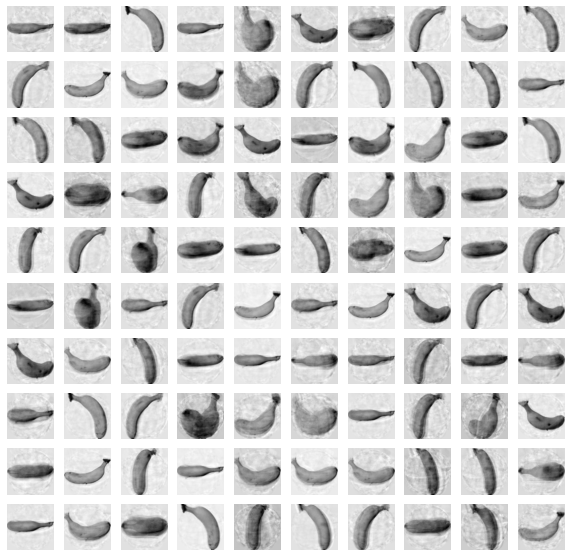

In [71]:
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start + 100])
    print('\n')

## KMeans 모델에 차원축소 데이터 적용하기

In [30]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state =42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [31]:
print(np.unique(km.labels_, return_counts =True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


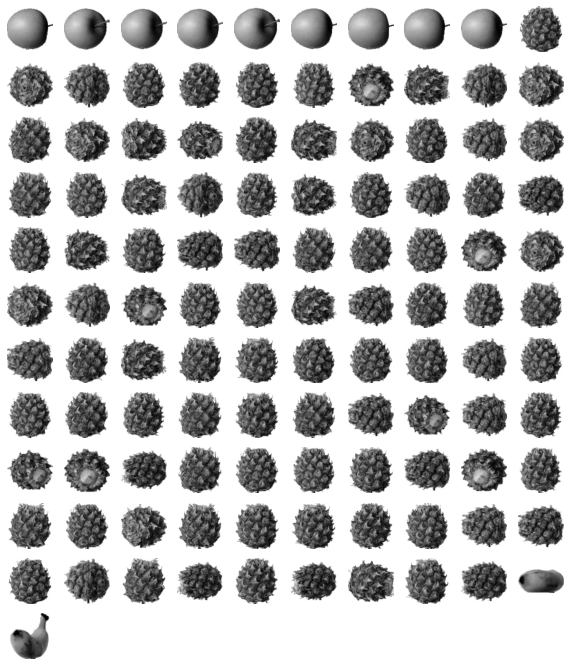

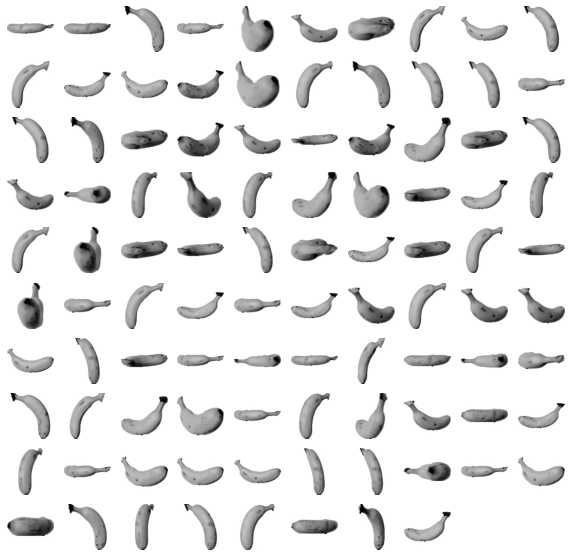

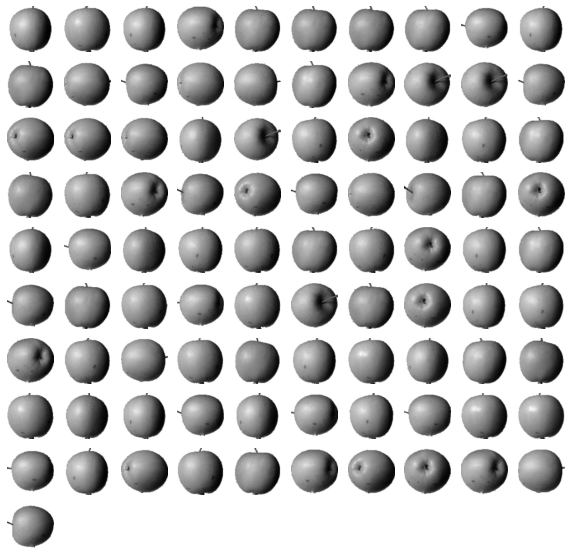

In [32]:
for label in range(0,3) :
    draw_fruits(fruits[km.labels_ ==label])
    print('\n')

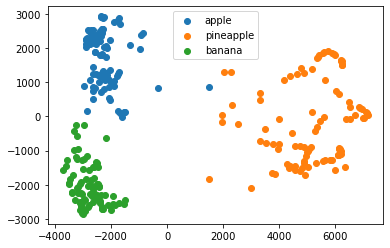

In [34]:
## 클러스터 구성 확인 --> 산점도로 시각화하여 확인
for label in range(0,3) :
    data = fruits_pca[km.labels_ ==label]
    plt.scatter(data[:,0], data[ :,1])
    
plt.legend(['apple','pineapple','banana'])

In [36]:
fruits_pca[km.labels_ ==label]

array([[-2778.41779459, -1571.87380937, -1335.33773558, ...,
           48.58553128,    34.9912492 ,   -71.25339156],
       [-3078.27365136, -2739.27040971,  -636.18337155, ...,
         -103.29743407,  -172.70461603,    63.82722816],
       [-2620.61072939, -1486.87055231, -1471.33777397, ...,
           -5.20159629,   -20.79012694,   -83.42424526],
       ...,
       [-3235.21083628, -2098.59882742,   392.55849201, ...,
          164.27655309,  -131.10748717,  -167.56725407],
       [-2517.44162248, -1374.42391345,  -179.43475869, ...,
          106.3417112 ,   111.59542035,  -188.76118748],
       [-2448.98211385, -2051.02045968,  1151.9318386 , ...,
          228.29686049,   -47.26941407,    33.17210552]])

## 로지스틱 회귀모델 적용해 보기

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


In [44]:
target =[0]*100 + [1]*100 +[2]*100

In [45]:
df = pd.DataFrame(fruits_2d)
df['target']=target
df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,target
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,1,1,1,1,2
296,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
297,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
298,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2


In [47]:
### 교차검증으로 성능 최대화
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d,target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.4384268283843994


In [48]:
scores

{'fit_time': array([0.41688585, 0.37200379, 0.41887784, 0.35106063, 0.63330603]),
 'score_time': array([0.00199413, 0.00199556, 0.00299215, 0.00199485, 0.00199342]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [49]:
pca = PCA(n_components =0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [53]:
print(pca.n_components_)

2


In [54]:
### 차원축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [55]:
scores = cross_validate(lr, fruits_pca,target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

##

0.99
0.03251795768737793


c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_